<a href="https://colab.research.google.com/github/SeyitKoyuncu/PyTorch-Self-Studying/blob/main/PyTorch_5(PyTorch_Custom_Datasets).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 0. Importing PyTorch and setting up device-agnostic code

In [1]:
import torch
from torch import nn

torch.__version__

'2.1.0+cu118'

In [2]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
!nvidia-smi

Sun Oct 29 08:34:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    12W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 1. Get Data

Dataset is a subset of Food101 dataset.

Food101 starts 101 different classes of food, our dataset starts with 3 classes

In [4]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory already exists... skipping download")
  image_path.mkdir(parents=True, exist_ok = True)

else:
  print(f"{image_path} does not exist, creating one...")
  image_path.mkdir(parents = True, exist_ok = True)

# Download pizza, steak and sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak and sushi data...")
  f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak and sushi data...")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi does not exist, creating one...
Unzipping pizza, steak and sushi data...


## 2. Data Preparation and Data exploration

In [5]:
import os
def walk_thorugh_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

In [6]:
walk_thorugh_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'


In [7]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Visualizing image

1. Get all of the image paths
2. Pick a random image path using Python's random.choice()
3. Get the image class name using **pathlib.Path.parent.stem**
4. Since we're working with images. let's open the image with Python's PIL
5. Then show th image and print metadata

data/pizza_steak_sushi/test/pizza/648055.jpg
Random image path: data/pizza_steak_sushi/test/pizza/648055.jpg
Image class: pizza
Image height:512
Image width: 512


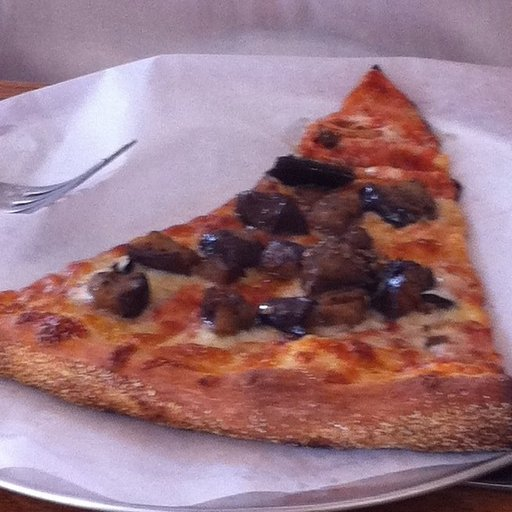

In [8]:
import random
from PIL import Image

# Set seed
random.seed(9)
torch.manual_seed(9)

# 1. Get all of the image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem # stem give the end of the folder

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height:{img.height}")
print(f"Image width: {img.width}")
img

(-0.5, 511.5, 511.5, -0.5)

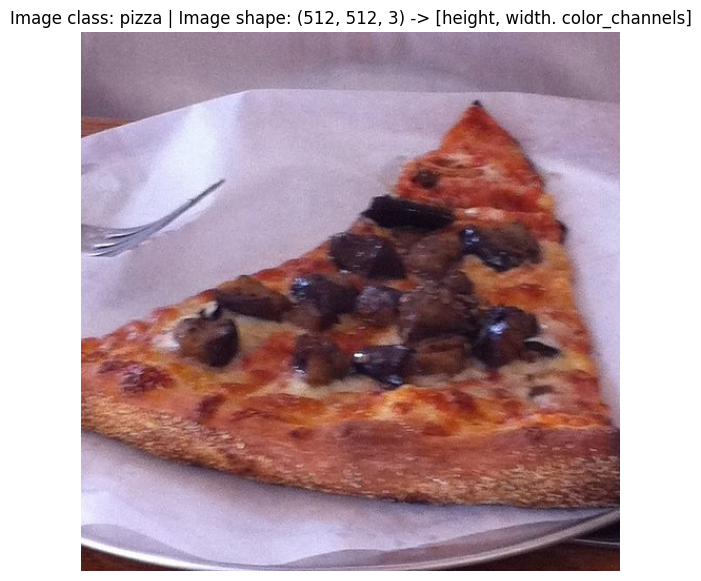

In [9]:
# Try to visualize and image with matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize = (10, 7))
#plt.imshow(img_as_array)
plt.imshow(img)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width. color_channels]")
plt.axis(False)

In [10]:
img_as_array

array([[[143, 124, 146],
        [141, 122, 144],
        [149, 130, 152],
        ...,
        [143, 118, 139],
        [144, 119, 138],
        [144, 119, 138]],

       [[147, 128, 150],
        [145, 126, 148],
        [147, 128, 150],
        ...,
        [144, 119, 140],
        [145, 120, 139],
        [146, 121, 140]],

       [[139, 120, 142],
        [142, 123, 145],
        [147, 128, 150],
        ...,
        [148, 123, 144],
        [152, 127, 146],
        [157, 132, 151]],

       ...,

       [[ 85,  36,  29],
        [ 82,  33,  26],
        [ 82,  33,  26],
        ...,
        [ 84,  35,  28],
        [ 84,  35,  28],
        [ 84,  35,  28]],

       [[ 89,  39,  32],
        [ 86,  36,  29],
        [ 85,  35,  28],
        ...,
        [ 79,  29,  20],
        [ 80,  30,  21],
        [ 80,  30,  21]],

       [[ 86,  36,  29],
        [ 86,  36,  29],
        [ 85,  35,  28],
        ...,
        [ 88,  38,  29],
        [ 92,  42,  33],
        [ 94,  44,  35]]

## 3. Transforming Data

Before we can use our image data with PyTorch:
1. Turn your target data into tensors
2. Turn it into a **torch.utils.data.Dataset** and subsequently a **torch.utils.data.DataLoader** we call these dataset and dataloader

In [11]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3.1 Transforming data with **torchvision.transforms**

Transforms help you get your images ready to be used with a model/perform data augmentation
https://pytorch.org/vision/main/transforms.html

In [12]:
# Write a transform for image
data_transform = transforms.Compose([
                                     # Resize our images to 64x64
                                     transforms.Resize(size = (64, 64)),
                                     # Flip the images randomly on the horizontal
                                     transforms.RandomHorizontalFlip(p = 0.5),
                                     # Turn the image into a torch.Tensor
                                     transforms.ToTensor()
                                     ])

In [13]:
data_transform(img).shape

torch.Size([3, 64, 64])

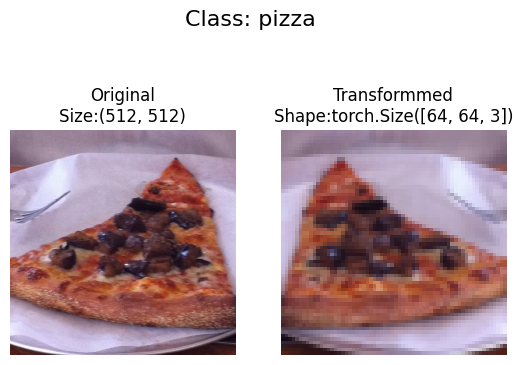

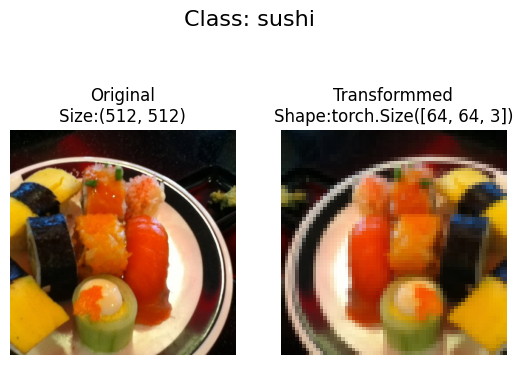

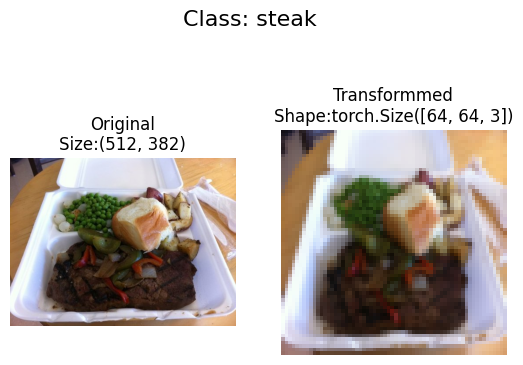

In [14]:
def plot_transformed_images(image_paths, transform, n = 3, seed = None):
  """
  Selects random images from a path of images and loads/transforms
  them then plots the original vs the transformed verison.
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k = n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows = 1, ncols = 2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize:{f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image = transform(f).permute(1, 2, 0) # note we will need to change shape for matplotlib
      # Matplotlib want color channel last, with permute we change the indexes 1 index come to 0, 2 index come to 1, 0 index come to 2
      # With this changing the order: orginal shape = (C, H, W), new shape = (H, W, C)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformmed\nShape:{transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize = 16)

plot_transformed_images(image_paths = image_path_list,
                        transform = data_transform,
                        seed = 9)

## 4. Option 1: Loading image data using **ImageFolder**
With using **torchvision.datasets.ImageFolder**
https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html

In [15]:
# Use imagefolder to create dataset
from torchvision import datasets
train_data = datasets.ImageFolder(root = train_dir,
                                  transform = data_transform, # Transform for the data
                                  target_transform = None) # Transform for the label/target

test_data = datasets.ImageFolder(root = test_dir,
                                 transform = data_transform,
                                 target_transform = None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [16]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [17]:
# Get class names as a dictionary
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [18]:
# Check the lengths of the dataset
len(train_data), len(test_data)

(225, 75)

In [19]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

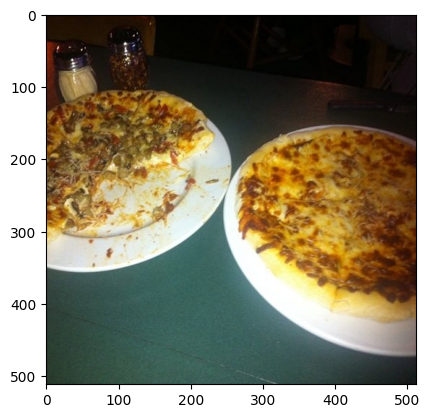

In [20]:
plt.imshow(Image.open(train_data.samples[0][0]))

In [21]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor: \n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label Datatype: {type(label)}")

Image tensor: 
 tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.

In [22]:
# Rearrenge the order of dimensions
img_permute = img.permute(1,2,0)

# Print out different shapes
print(f"Original shape: {img.shape}, Permuted shape: {img_permute.shape}")

Original shape: torch.Size([3, 64, 64]), Permuted shape: torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

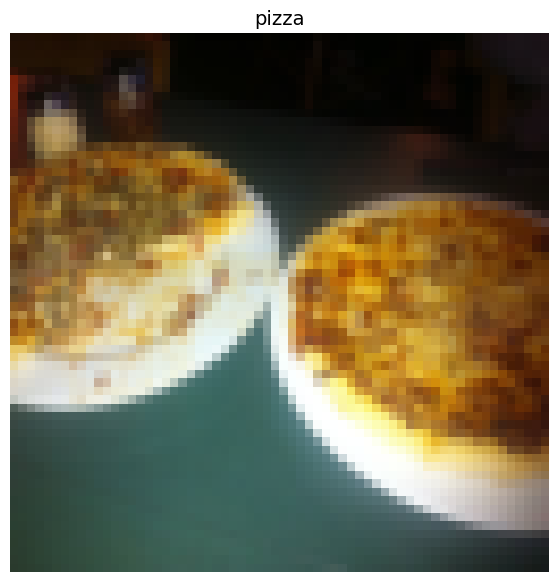

In [23]:
# Plot the image
plt.figure(figsize = (10, 7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(class_names[label], fontsize = 14)

## 4.1 Turn loaded images into **DataLoaders**

With dataloader we use datasets like iterables and we can use batchsize

In [24]:
from torch.utils.data import DataLoader
import os

BATCH_SIZE = 32
train_dataloader = DataLoader(train_data, batch_size = BATCH_SIZE, num_workers = os.cpu_count(), shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = BATCH_SIZE, num_workers = os.cpu_count(), shuffle = False)

In [25]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c2dff271cf0>,
 <torch.utils.data.dataloader.DataLoader at 0x7c2dff272890>)

In [26]:
len(train_dataloader), len(test_dataloader)

(8, 3)

In [27]:
len(train_data), len(test_data)

(225, 75)

In [28]:
img, label = next(iter(train_dataloader))
print(f"Image shape: {img.shape}")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 64, 64])
Label shape: torch.Size([32])


### 5 Option 2: Loading Image Data with a Custom Dataset
1. Want to be able to load images from file
2. Want to be able to get class names from the Dataset
3. Want to be able to get classes as dictionary from the Dataset

All custom datasets in PyTorch, often subclass - https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset

In [29]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [30]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1  Creating a helper function to get class names

1. Get the class names using os.scandir() to traverse a target directory (ideally the directory is in standard image classification format).
2. Raise an error if the class names aren't found (if this happens, there might be something wrong with the directory structure).
3. Turn the class names into a dict and a list and return them

In [31]:
# Setup path for target directory
target_directory = train_dir
print(f"Target dir: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [32]:
list(os.scandir(target_directory))

[<DirEntry 'pizza'>, <DirEntry 'steak'>, <DirEntry 'sushi'>]

In [33]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """Finds the class folder names in a target directory."""
  # 1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # 2. Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}... please check file structure.")

  # 3. Create a dictionary of index labels (computers prefer numbers rather than strings as labels)
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx

In [34]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom Dataset to replicate ImageFolder

To create our own custom dataset, we want to:

1. Subclass torch.utils.data.Dataset
2. Init our subclass with a target directory (the directory we'd like to get data from) as well as a transform if we'd like to transform our data.
3. Create several attributes:
  * paths - paths of our images
  * transform - the transform we'd like to use
  * classes - a list of the target classes
  * class_to_idx - a dict of the target classes mapped to integer labels
4. Create a function to load_images(), this function will open an image
5. Overwrite the __len()__ method to return the length of our dataset
6. Overwrite the __getitem()__ method to return a given sample when passed an index

In [35]:
# Write a custom dataset class
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  # 2. Initialize our custom dataset
  def __init__(self, targ_dir: str, transform = None):
    # 3. Create class attributes
    # Get all of the image paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    # Setup transforms
    self.transform = transform
    # Create classes and class_to_idx attributes
    self.classes, self.class_to_idx = find_classes(targ_dir)

  # 4. Create a function to load imaged
  def load_image(self, index: int) -> Image.Image:
    """Opens and image via a path and returns it."""
    image_path = self.paths[index]
    return Image.open(image_path)

  # 5. Overwrite __len__()
  def __len__(self) -> int:
    """Returns the total number of samples."""
    return len(self.paths)

  # 6. Overwrite __getitem__() method to return a particular sample
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    """Returns one sample of data, data and label(X,y)."""
    img = self.load_image(index)
    class_name = self.paths[index].parent.name # expects path in format: data_folder/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]

    # Transform if necessary
    if self.transform:
      return self.transform(img), class_idx # return data, label (X, y)

    else:
      return img, class_idx # return untransformed image and label

In [36]:
# Create a transform
from torchvision import transforms

train_transforms = transforms.Compose([transforms.Resize(size = (64, 64)),
                                      transforms.RandomHorizontalFlip(p = 0.5),
                                      transforms.ToTensor()])

test_transforms = transforms.Compose([transforms.Resize(size = (64, 64)),
                                      transforms.ToTensor()])

In [37]:
# Test out ImageFolderCustom
train_data_custom = ImageFolderCustom(targ_dir = train_dir,
                                      transform = train_transforms)

test_data_custom = ImageFolderCustom(targ_dir = test_dir,
                                     transform = test_transforms)

In [38]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7c2dff287cd0>,
 <__main__.ImageFolderCustom at 0x7c2dff287dc0>)

In [39]:
train_data

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [40]:
len(train_data), len(train_data_custom)

(225, 225)

In [41]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [42]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [43]:
# Check for equality between original ImageFolder Dataset and ImageFolderCustomDataset
print(train_data_custom.classes == train_data.classes)
print(test_data_custom.classes == test_data.classes)

True
True


### 5.3 Create a function to display random images

1. Take in a `Dataset` and a number of other parameters such as class names and how many images to visualize.
2. Set the random seed for reproducinbility
3. Get a list of random sample indexes from the target dataset
4. Setup a matplotlib plot
5. Loop through the random sample images and plot them with matplotlib


In [44]:
def DisplayRandomImages(dataset: torch.utils.data.Dataset,
                        classes: List[str] = None,
                        n: int = 10,
                        display_shape: bool = True,
                        seed: int = None):
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display purposes n cant be larger than 10, setting to 10 and removing display_shape")

  if seed:
    random.seed(seed)

  # Get random sample indexes
  random_samples_idx = random.sample(range(len(dataset)), k = n)

  plt.figure(figsize=(16, 8))

  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # Adjust tensor dimension for plotting
    targ_image_adjust = targ_image.permute(1, 2, 0)

    # Plot adjusted samples
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)

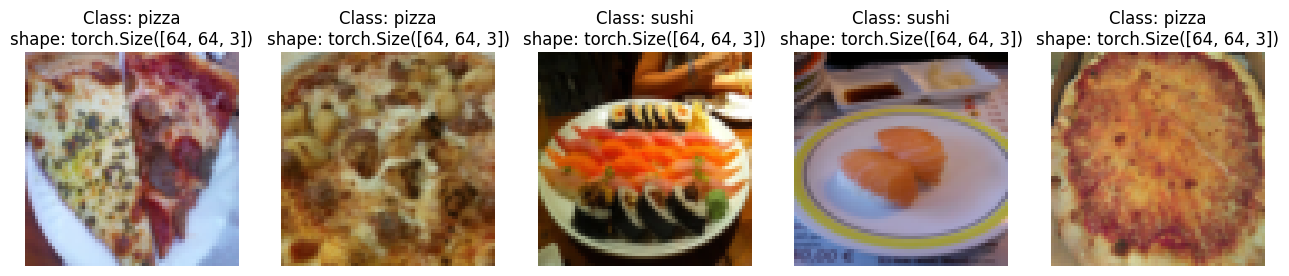

In [45]:
DisplayRandomImages(train_data_custom, classes = class_names, n=5, seed = None)

For display purposes n cant be larger than 10, setting to 10 and removing display_shape


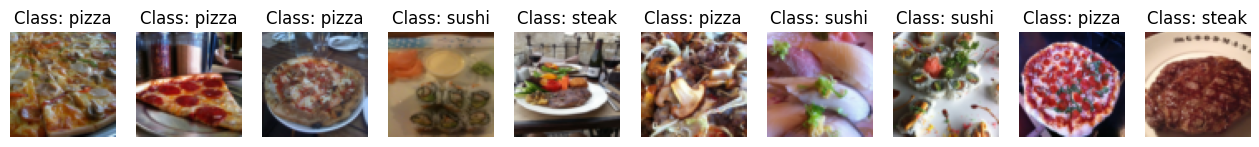

In [46]:
DisplayRandomImages(train_data_custom,
                    n = 13,
                    classes = class_names,
                    seed = 123)

### 5.4 Turn Custom Loaded Images Into the DataLoader

In [47]:
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset = train_data_custom,
                                     batch_size = BATCH_SIZE,
                                     num_workers = 0,
                                     shuffle = True)

test_dataloader_custom = DataLoader(dataset = test_data_custom,
                                    batch_size = BATCH_SIZE,
                                    num_workers = os.cpu_count(),
                                    shuffle = False)

train_dataloader_custom , test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7c2dfe58afb0>,
 <torch.utils.data.dataloader.DataLoader at 0x7c2dfe5da5f0>)

In [48]:
# Get image and label from custom datalaoader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Print out the shapes
img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [49]:
img_custom

tensor([[[[0.8353, 0.8353, 0.7373,  ..., 0.6275, 0.5569, 0.4275],
          [0.8235, 0.8078, 0.7569,  ..., 0.5922, 0.4588, 0.4157],
          [0.7529, 0.7020, 0.6392,  ..., 0.4706, 0.4078, 0.4588],
          ...,
          [0.2863, 0.1608, 0.1922,  ..., 0.4510, 0.4510, 0.4196],
          [0.2549, 0.1804, 0.2510,  ..., 0.4980, 0.4824, 0.4588],
          [0.2078, 0.1843, 0.2980,  ..., 0.4902, 0.5020, 0.4980]],

         [[0.7608, 0.7451, 0.6275,  ..., 0.1176, 0.1098, 0.0824],
          [0.7490, 0.7098, 0.6431,  ..., 0.1137, 0.0902, 0.0902],
          [0.6392, 0.5569, 0.4824,  ..., 0.0941, 0.0824, 0.0980],
          ...,
          [0.2627, 0.1490, 0.1765,  ..., 0.3255, 0.3373, 0.3176],
          [0.2353, 0.1608, 0.2196,  ..., 0.3725, 0.3882, 0.3725],
          [0.2157, 0.1804, 0.2510,  ..., 0.3529, 0.4000, 0.4314]],

         [[0.5059, 0.5176, 0.4235,  ..., 0.0667, 0.0549, 0.0353],
          [0.4902, 0.4745, 0.3961,  ..., 0.0745, 0.0510, 0.0392],
          [0.3882, 0.3216, 0.2549,  ..., 0

In [50]:
label_custom

tensor([1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 2, 2, 1, 0, 2])

## 6. Other forms of transforms (data augmentation)

Data augmentation is a technique in machine learning used to reduce overfitting when training a machine learning model, by training models on several slightly-modified copies of existing data.

https://en.wikipedia.org/wiki/Data_augmentation

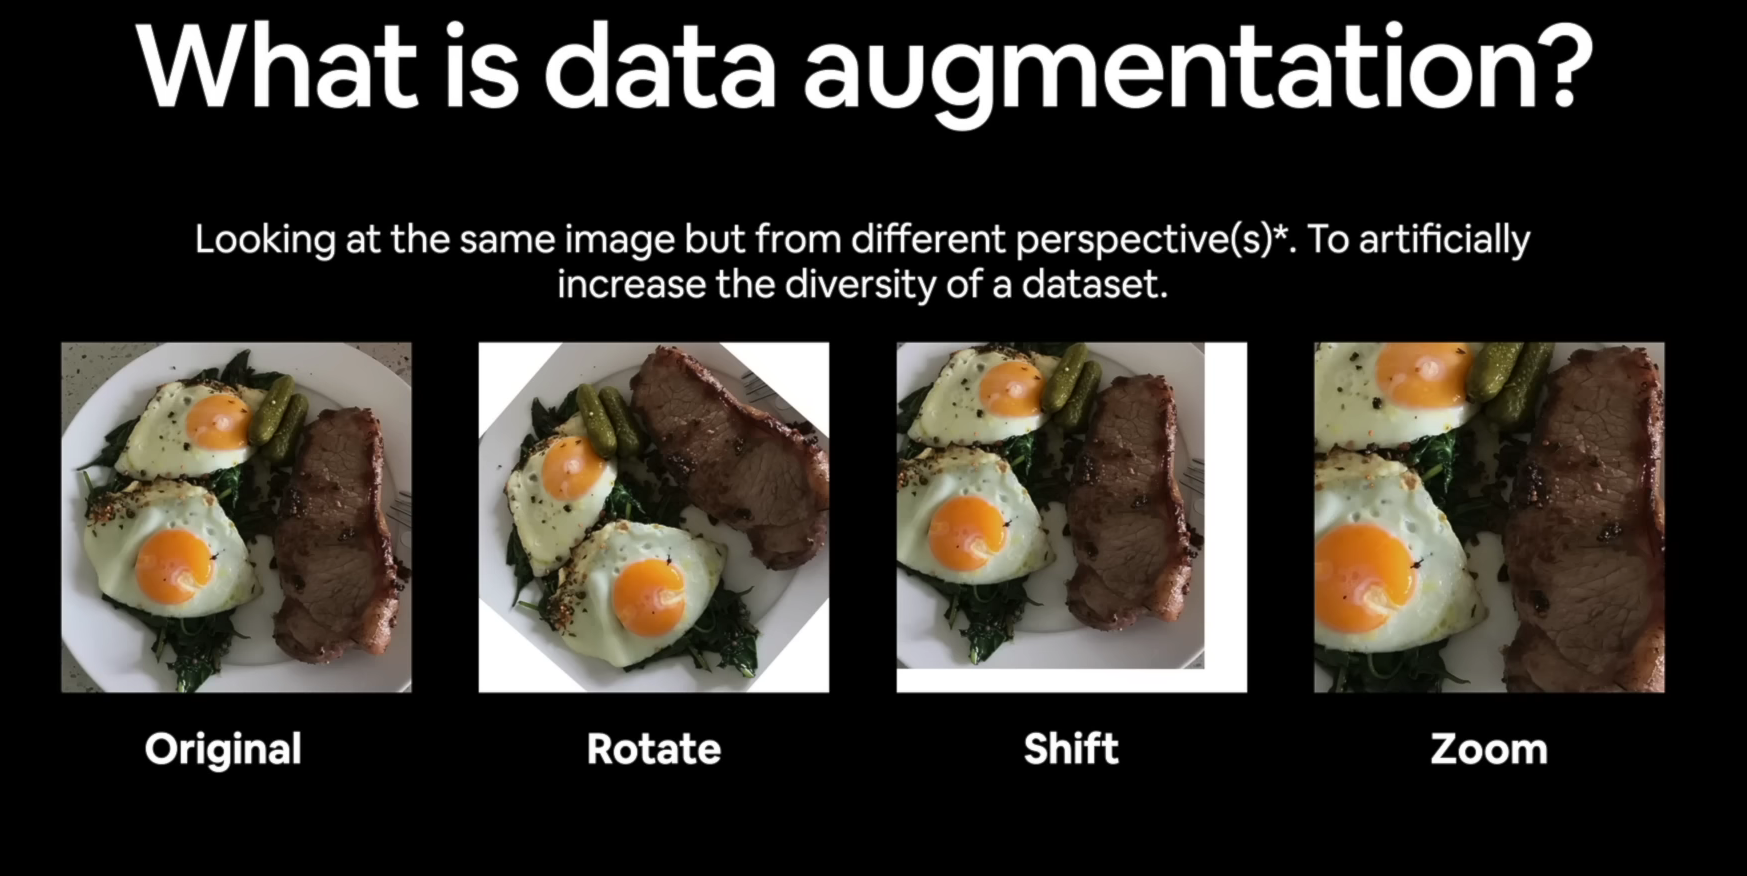

In [51]:
from torchvision import transforms

train_transform = transforms.Compose([transforms.Resize(size = (224, 224)),
                                     transforms.TrivialAugmentWide(num_magnitude_bins = 31),
                                     transforms.ToTensor()])

test_transform = transforms.Compose([transforms.Resize(size = (224, 224)),
                                     transforms.ToTensor()])

In [52]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/train/pizza/2702825.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/764429.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/300869.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2992084.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2451169.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1105700.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/853441.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/667309.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2428085.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/702165.jpg')]

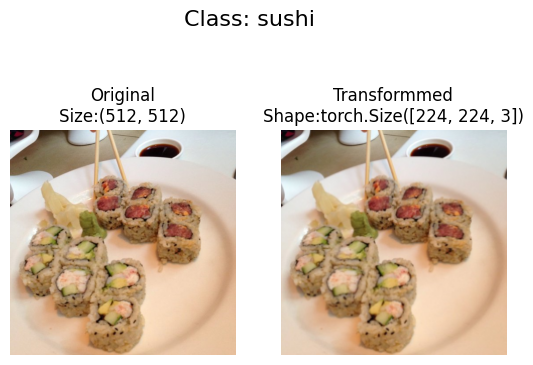

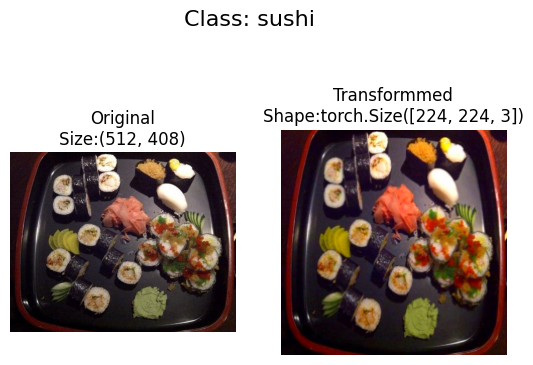

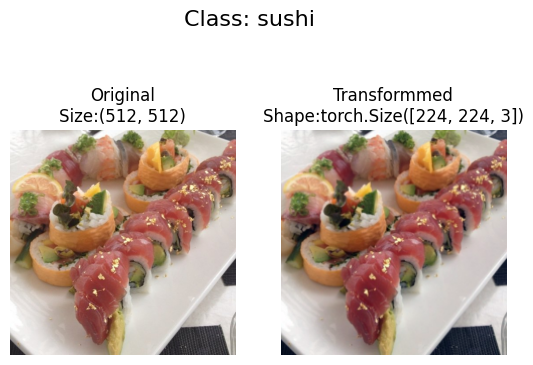

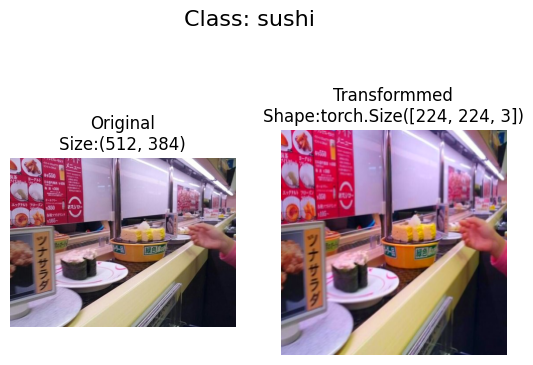

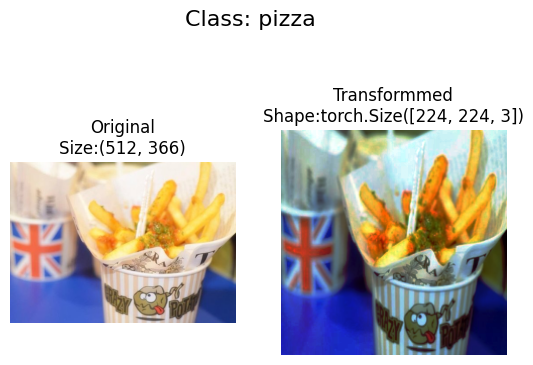

In [53]:
# Plot random transformed images
plot_transformed_images(image_paths = image_path_list,
                      transform = train_transform,
                      n = 5)

## 7. Model 0:

### 7.1 Creating transforms and loading data for Model 0

In [54]:
# Create simple transform
simple_transform = transforms.Compose([transforms.Resize(size = (64, 64)),
                                       transforms.ToTensor()])

In [55]:
# 1. Load and transform data
train_data_simple = datasets.ImageFolder(root = train_dir,
                                         transform = simple_transform)

test_data_simple = datasets.ImageFolder(root = test_dir,
                                        transform = simple_transform)

In [56]:
# Turn the datasets into dataloaders
NUM_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(dataset = train_data_simple,
                                     batch_size = 32,
                                     num_workers = NUM_WORKERS,
                                     shuffle = True)

test_dataloader_simple = DataLoader(dataset = train_data_simple,
                                     batch_size = 32,
                                     num_workers = NUM_WORKERS,
                                     shuffle = False)

### 7.2 Create TinyVGG model Class

In [57]:
class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from CNN explainer
  """
  def __init__(self, input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2))

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2))

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units * 16 * 16,
                  out_features = output_shape))

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    #print(x.shape)
    return x
    return self.classifier(self.conv_block_2(self.conv_block_1(x))) # benefits from operater fusion

In [58]:
torch.manual_seed(9)
model_0 = TinyVGG(input_shape = 3, # number of color channels in our image dara
                  hidden_units = 10,
                  output_shape = len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

### 7.3 Try a forward pass on a single image(to test the model)

In [59]:
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [60]:
# Try a forward pass
model_0(image_batch.to(device))

tensor([[-0.0214, -0.0112, -0.0095],
        [-0.0238, -0.0117, -0.0068],
        [-0.0220, -0.0139, -0.0062],
        [-0.0249, -0.0160, -0.0092],
        [-0.0180, -0.0116, -0.0080],
        [-0.0232, -0.0157, -0.0069],
        [-0.0205, -0.0144, -0.0113],
        [-0.0302, -0.0147, -0.0022],
        [-0.0218, -0.0119, -0.0066],
        [-0.0226, -0.0116, -0.0082],
        [-0.0198, -0.0157, -0.0063],
        [-0.0208, -0.0105, -0.0076],
        [-0.0268, -0.0158, -0.0039],
        [-0.0228, -0.0168, -0.0118],
        [-0.0240, -0.0129, -0.0039],
        [-0.0251, -0.0126, -0.0078],
        [-0.0221, -0.0153, -0.0104],
        [-0.0212, -0.0129, -0.0118],
        [-0.0209, -0.0107, -0.0063],
        [-0.0233, -0.0136, -0.0079],
        [-0.0242, -0.0118, -0.0073],
        [-0.0232, -0.0155, -0.0035],
        [-0.0251, -0.0163, -0.0059],
        [-0.0177, -0.0118, -0.0057],
        [-0.0151, -0.0131, -0.0063],
        [-0.0238, -0.0105, -0.0074],
        [-0.0219, -0.0134, -0.0067],
 

### 7.4 use ´torchinfo´ to get and idea of the shapes going through our model

In [61]:
# Install torchinfo, import if it's available
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size = [1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

## 7.5 Create train and test step loops function

In [62]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device = "cpu"):

  """ Perform a training with model trying to learn on data_loader"""

  model.train()
  train_loss, train_acc = 0, 0
  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred, dim = 1), dim = 1)
    train_acc += (y_pred_class == y).sum().item() / len(y_pred)

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  return train_loss, train_acc

def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device = "cpu"):
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for batch, (X,y) in enumerate(data_loader):
      X, y = X.to(device), y.to(device)
      y_pred = model(X)
      test_loss += loss_fn(y_pred, y).item()

      y_pred_class = torch.argmax(torch.softmax(y_pred, dim = 1), dim = 1)
      test_acc += (y_pred_class == y).sum().item() / len(y_pred)

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
  return test_loss, test_acc


In [63]:
from tqdm.auto import tqdm

def train(train_data_loader: torch.utils.data.DataLoader,
          test_data_loader: torch.utils.data.DataLoader,
          model: torch.nn.Module,
          loss_fn: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          epochs: int = 5,
          device: torch.device = "cpu"):

  results ={
      "train_loss": [],
      "train_acc": [],
      "test_loss": [],
      "test_acc": []
  }

  for epoch in tqdm(range(epochs)):
    training_results = train_step(model = model,
                                  data_loader = train_data_loader,
                                  loss_fn = loss_fn,
                                  optimizer = optimizer,
                                  device = device)

    testing_results = test_step(model = model,
                                  data_loader = test_data_loader,
                                  loss_fn = loss_fn,
                                  device = device)
    print(f"Results in {epoch+1}. epoch | Training Loss:{training_results[0]}, | Training Accuracy:{training_results[1]} | Testing Loss:{testing_results[0]}, |Testing Accuracy:{testing_results[1]}\n")

    results["train_loss"].append(training_results[0])
    results["train_acc"].append(training_results[1])
    results["test_loss"].append(testing_results[0])
    results["test_acc"].append(testing_results[1])

  return results

## Train and Evaulate model0

In [64]:
# Set the random seeds
torch.manual_seed(9)
torch.cuda.manual_seed(9)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape = 3, # number of color channels
                  hidden_units = 10,
                  output_shape = len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr = 0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model = model_0,
                        train_data_loader = train_dataloader_simple,
                        test_data_loader = test_dataloader_simple,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs = NUM_EPOCHS,
                        device = device)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} senonds")

  0%|          | 0/5 [00:00<?, ?it/s]

Results in 1. epoch | Training Loss:1.1131792515516281, | Training Accuracy:0.2421875 | Testing Loss:1.1041531711816788, |Testing Accuracy:0.29296875

Results in 2. epoch | Training Loss:1.0970097780227661, | Training Accuracy:0.296875 | Testing Loss:1.1079229265451431, |Testing Accuracy:0.3046875

Results in 3. epoch | Training Loss:1.1143032014369965, | Training Accuracy:0.3046875 | Testing Loss:1.1078364551067352, |Testing Accuracy:0.32421875

Results in 4. epoch | Training Loss:1.1001167446374893, | Training Accuracy:0.375 | Testing Loss:1.0915957391262054, |Testing Accuracy:0.43359375

Results in 5. epoch | Training Loss:1.0898429900407791, | Training Accuracy:0.45703125 | Testing Loss:1.0737981498241425, |Testing Accuracy:0.5859375

Total training time: 8.504 senonds


In [65]:
model_0_results

{'train_loss': [1.1131792515516281,
  1.0970097780227661,
  1.1143032014369965,
  1.1001167446374893,
  1.0898429900407791],
 'train_acc': [0.2421875, 0.296875, 0.3046875, 0.375, 0.45703125],
 'test_loss': [1.1041531711816788,
  1.1079229265451431,
  1.1078364551067352,
  1.0915957391262054,
  1.0737981498241425],
 'test_acc': [0.29296875, 0.3046875, 0.32421875, 0.43359375, 0.5859375]}

### Plot the loss curves of Model 0

https://developers.google.com/machine-learning/testing-debugging/metrics/interpretic

In [66]:
# Get the model_0_results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [67]:
def plot_loss_curves(results: Dict[str, list[float]]):
  """ Plots training curves of a results dictionary """
  # Get the loss values of the results dictionary (training and test)
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # Get the accuracy values of the results dictionary (training and test)
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  # Figure out how many epochs there were
  epochs = range(len(results["train_loss"]))

  # Setup a plot
  plt.figure(figsize = (15, 7))

  # Plot the loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label = "train_loss")
  plt.plot(epochs, test_loss, label = "test_loss")
  plt.title("Loss Curve")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot the accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label = "train_accuracy")
  plt.plot(epochs, test_accuracy , label = "test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

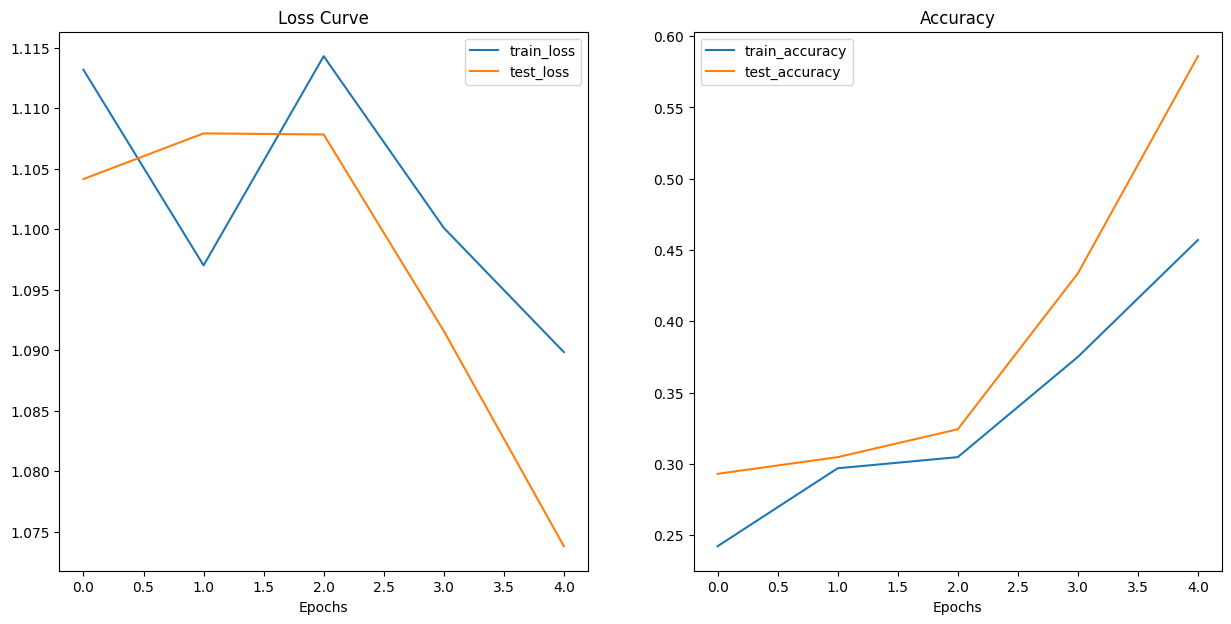

In [68]:
plot_loss_curves(model_0_results)

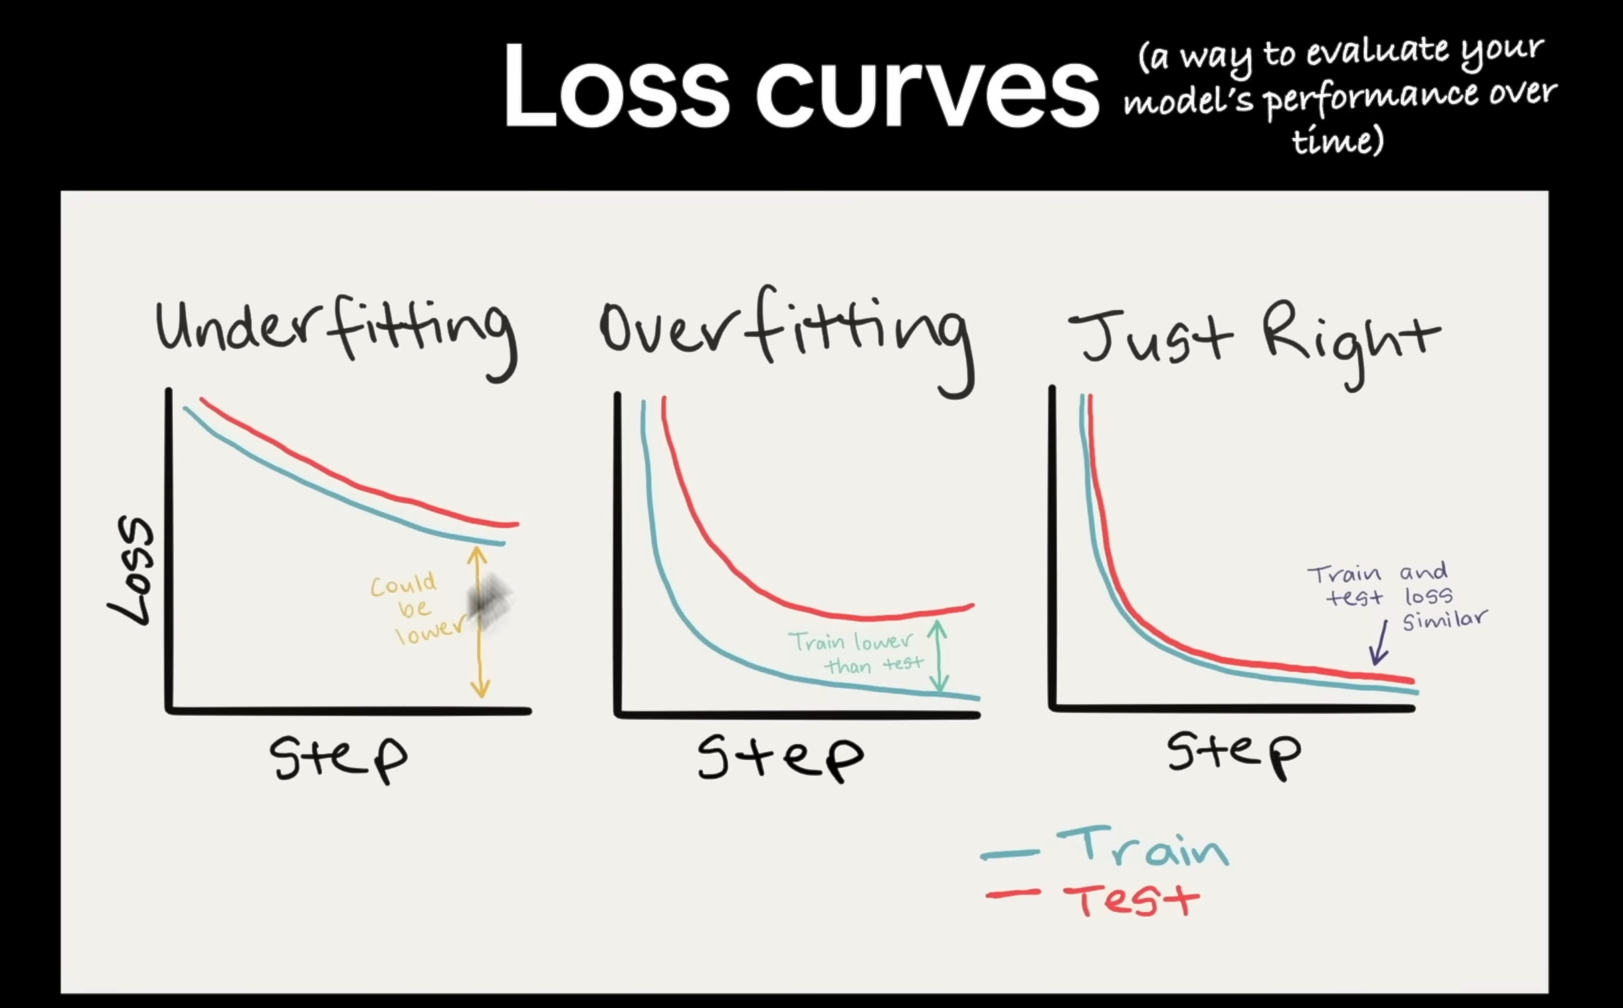

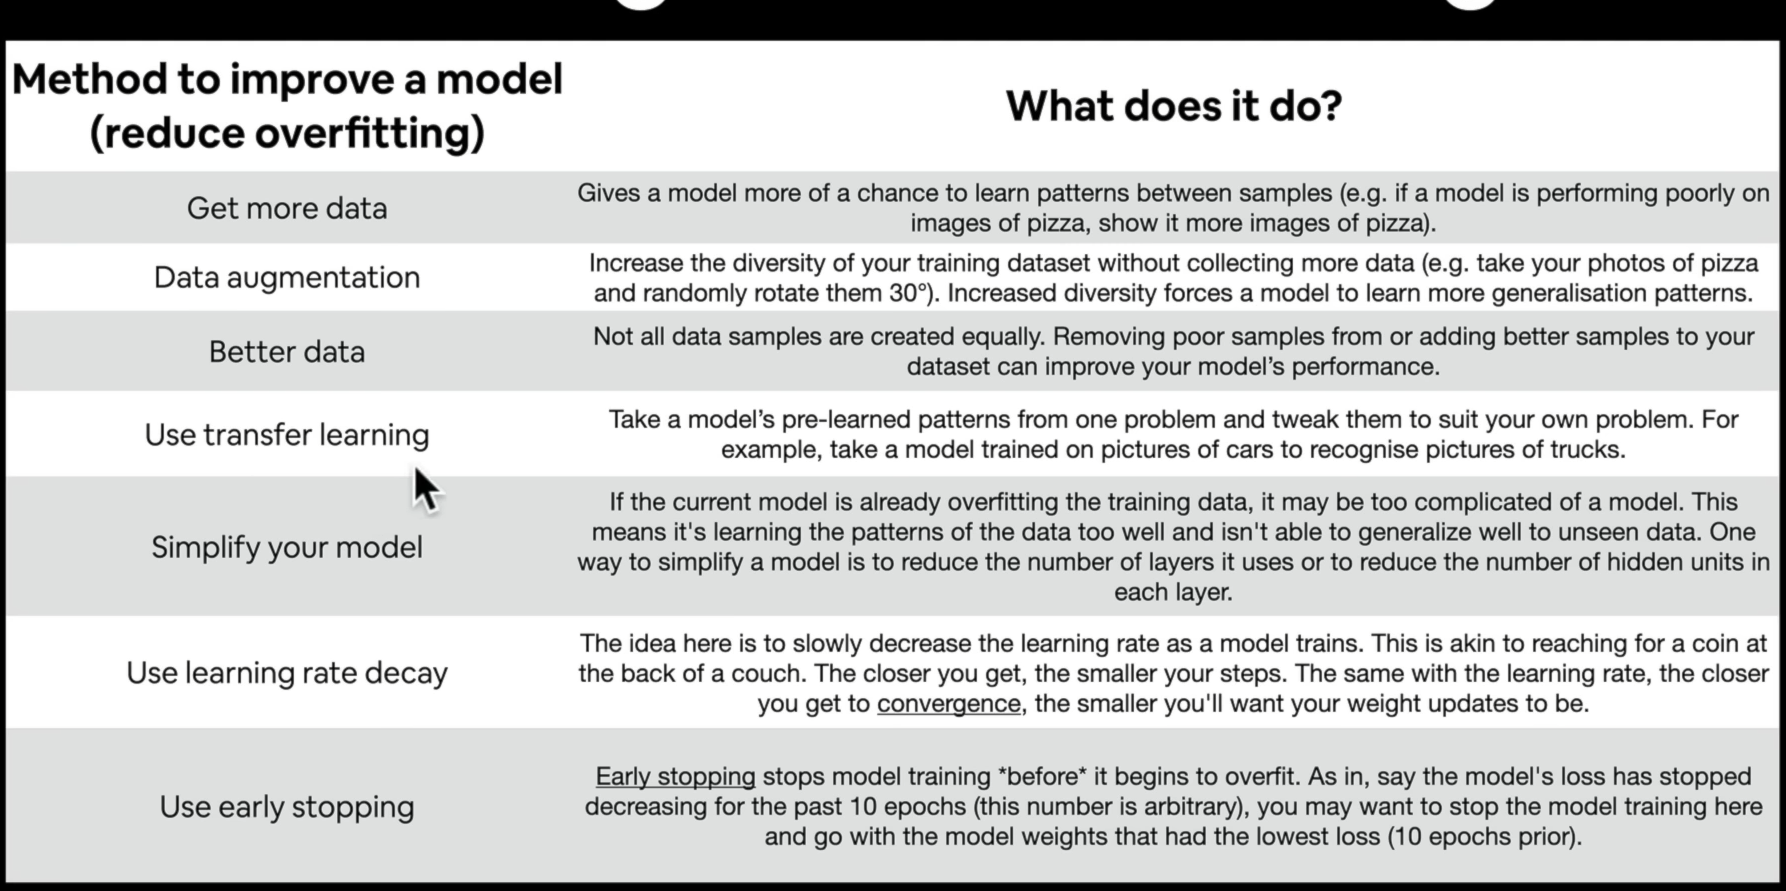

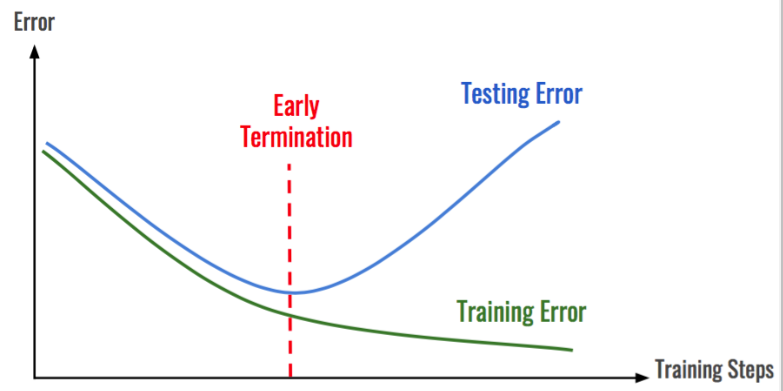

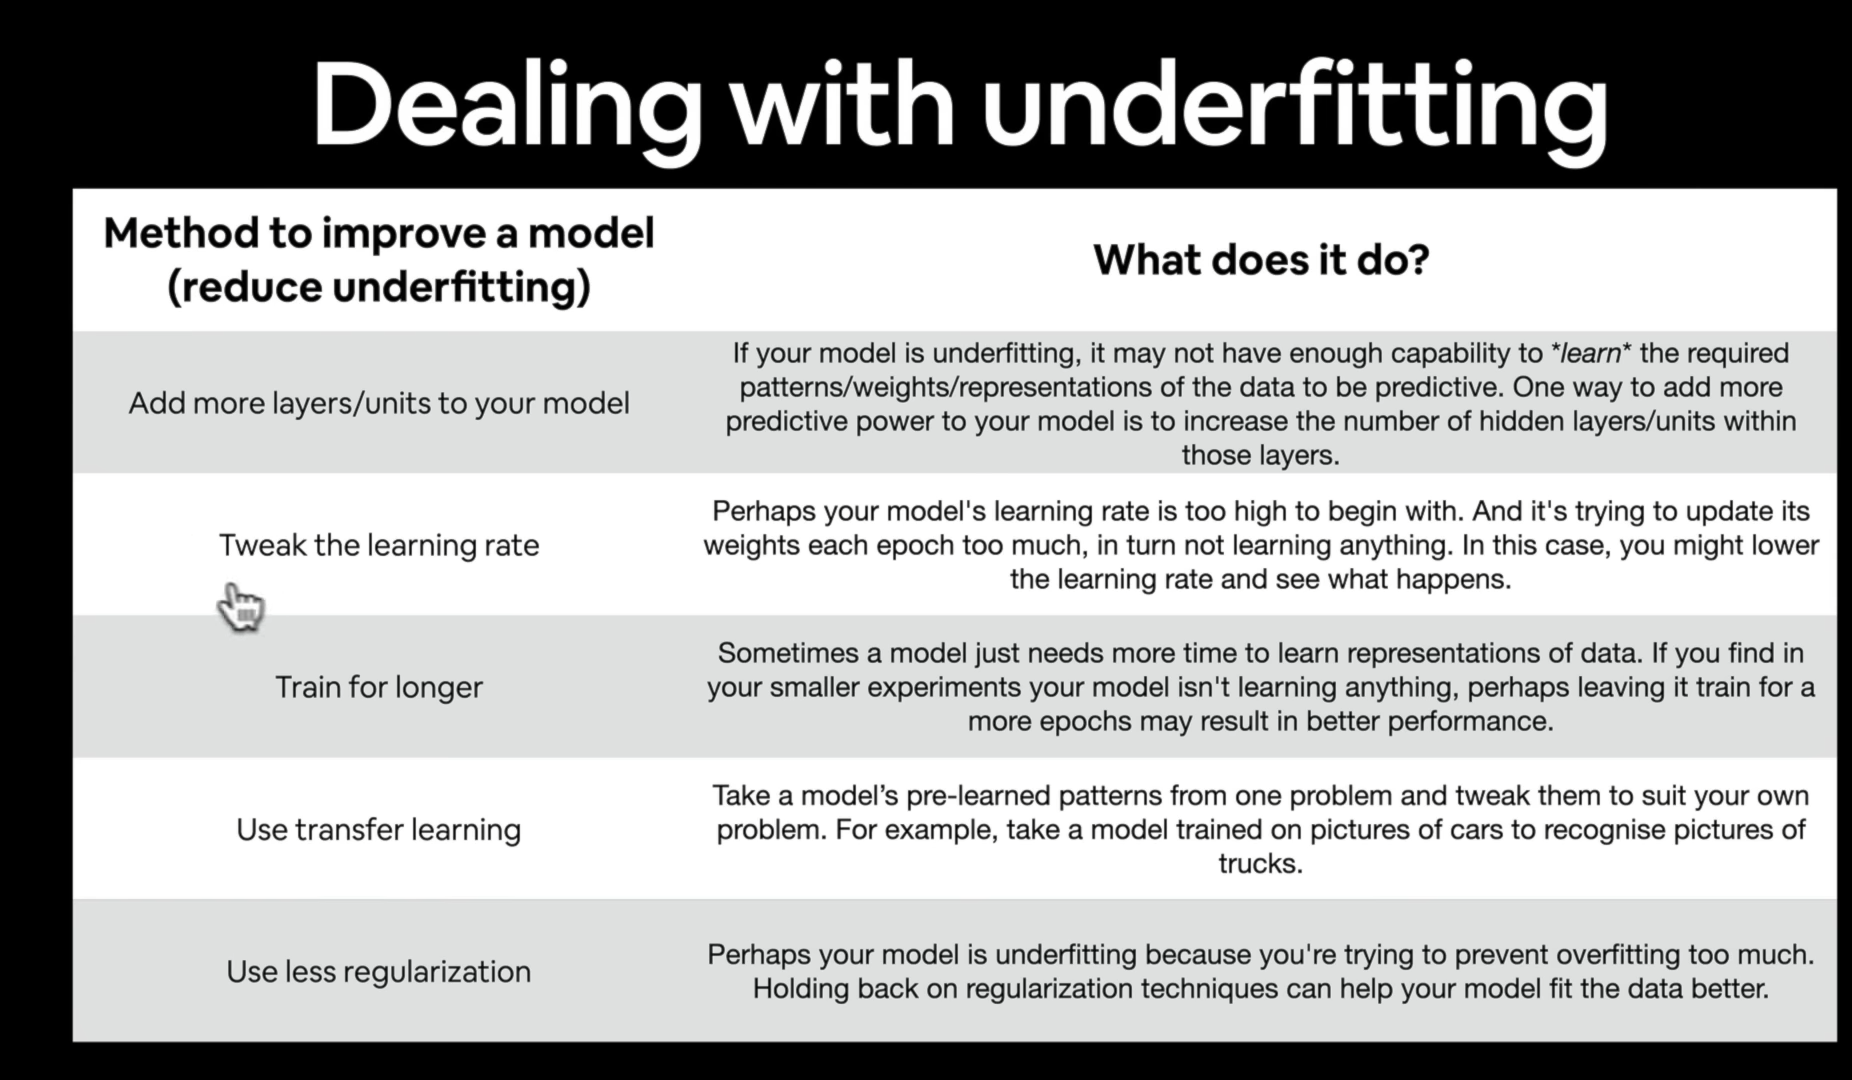

## Model 1 : TinyVGG with Data Augmentation

Using the same model as before with some data augmentation.

### Craete transform with data augmentation

In [69]:
# Create training transform with TriviailAugment
from torchvision import transforms
train_transform_trivial = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins = 31),
    transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.ToTensor()
])

### Create train and test Datasets and DataLoaders with data augmentation

In [70]:
# Turn image folders into Datasets
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root = train_dir,
                                            transform = train_transform_trivial)
test_data_simple = datasets.ImageFolder(root = test_dir,
                                         transform = test_transform_simple)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [71]:
# Turn datasets into DataLoaders
import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(9)
train_dataloader_augmented = DataLoader(dataset = train_data_simple,
                                        batch_size = BATCH_SIZE,
                                        shuffle = True,
                                        num_workers = NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset = test_data_simple,
                                    batch_size = BATCH_SIZE,
                                    shuffle = True,
                                    num_workers = NUM_WORKERS)

train_dataloader_augmented, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7c2dff657d00>,
 <torch.utils.data.dataloader.DataLoader at 0x7c2dff57dff0>)

### Construct and train model 1

In [72]:
# Create model_1 and send it to the target device
torch.manual_seed(9)
model_1 = TinyVGG(input_shape = 3,
                  hidden_units = 10,
                  output_shape = len(train_data_augmented.classes)).to(device)

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [73]:
torch.manual_seed(9)
torch.cuda.manual_seed(9)

# Set the number of epochs
NUM_EPOCHS = 5

# Setup Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_1.parameters(),
                             lr = 0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_1
model_1_results = train(model = model_1,
                        loss_fn = loss_fn,
                        optimizer = optimizer,
                        train_data_loader = train_dataloader_augmented,
                        test_data_loader = test_dataloader_simple,
                        epochs = NUM_EPOCHS,
                        device = device)

# End the timer
end_time = timer()
print(f"Total training time for model_1: {end_time - start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Results in 1. epoch | Training Loss:1.0947856456041336, | Training Accuracy:0.38671875 | Testing Loss:1.0963200728098552, |Testing Accuracy:0.35984848484848486

Results in 2. epoch | Training Loss:1.0827643796801567, | Training Accuracy:0.42578125 | Testing Loss:1.1077011823654175, |Testing Accuracy:0.33996212121212127

Results in 3. epoch | Training Loss:1.0790761709213257, | Training Accuracy:0.42578125 | Testing Loss:1.131156086921692, |Testing Accuracy:0.300189393939394

Results in 4. epoch | Training Loss:1.0812229365110397, | Training Accuracy:0.42578125 | Testing Loss:1.0869728922843933, |Testing Accuracy:0.41950757575757575

Results in 5. epoch | Training Loss:1.1356762647628784, | Training Accuracy:0.3046875 | Testing Loss:1.1100552876790364, |Testing Accuracy:0.35984848484848486

Total training time for model_1: 5.458 seconds


### Plot the loss curves of Model 1

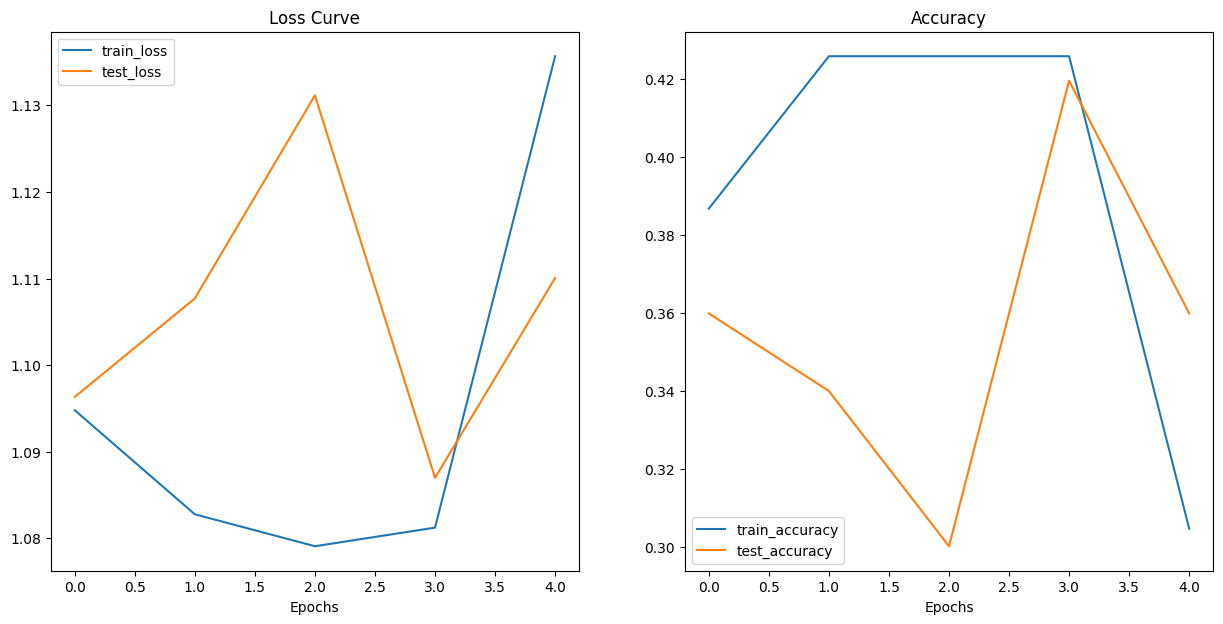

In [74]:
plot_loss_curves(model_1_results)

## Compare model results

There's a few differenet ways to do this:
1. Hard coding
2. PyTorch + Tensorboard - https://pytorch.org/docs/stable/tensorboard.html
3. Weights & Biases - https://wandb.ai/
4. MLFlow - https://mlflow.org/

In [75]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df, model_1_df

(   train_loss  train_acc  test_loss  test_acc
 0    1.113179   0.242188   1.104153  0.292969
 1    1.097010   0.296875   1.107923  0.304688
 2    1.114303   0.304688   1.107836  0.324219
 3    1.100117   0.375000   1.091596  0.433594
 4    1.089843   0.457031   1.073798  0.585938,
    train_loss  train_acc  test_loss  test_acc
 0    1.094786   0.386719   1.096320  0.359848
 1    1.082764   0.425781   1.107701  0.339962
 2    1.079076   0.425781   1.131156  0.300189
 3    1.081223   0.425781   1.086973  0.419508
 4    1.135676   0.304688   1.110055  0.359848)

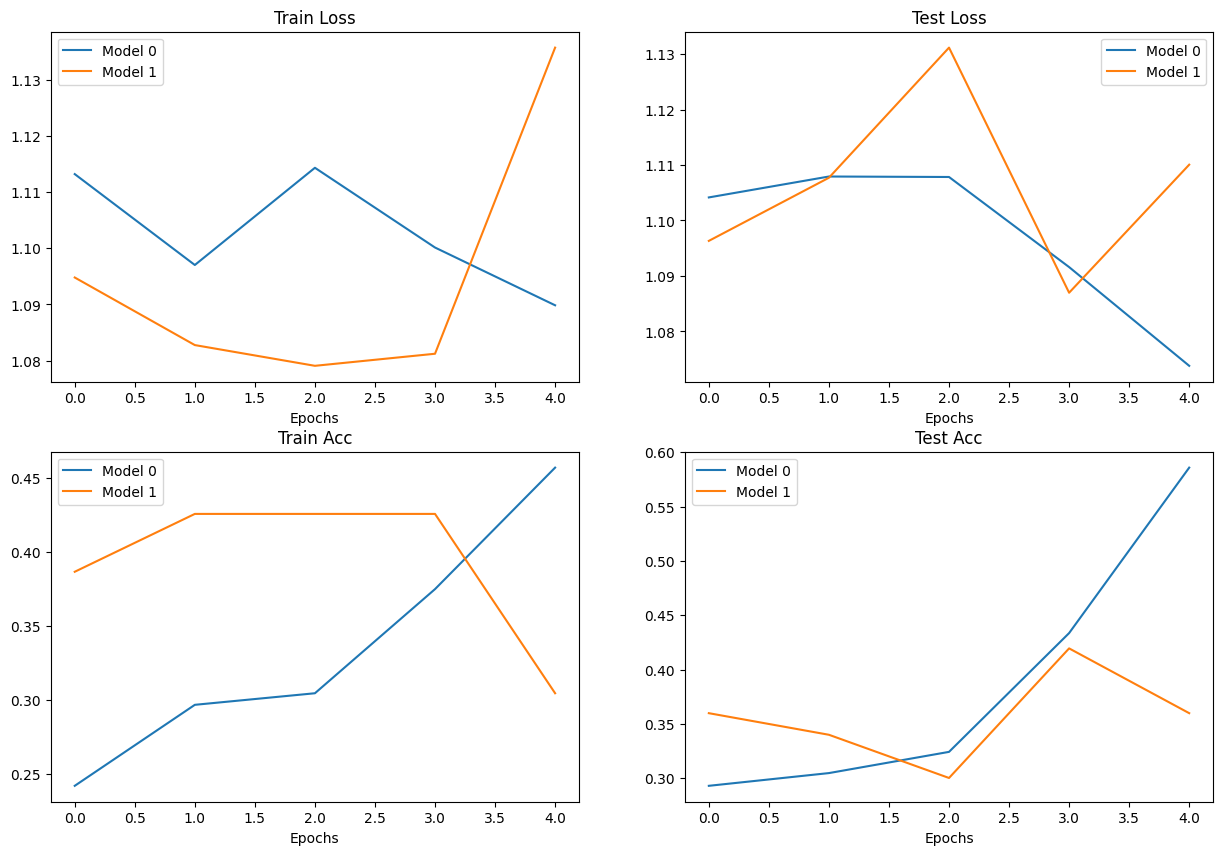

In [82]:
# Setup a plot
plt.figure(figsize = (15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label = "Model 0")
plt.plot(epochs, model_1_df["train_loss"], label = "Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label = "Model 0")
plt.plot(epochs, model_1_df["test_loss"], label = "Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train acc
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label = "Model 0")
plt.plot(epochs, model_1_df["train_acc"], label = "Model 1")
plt.title("Train Acc")
plt.xlabel("Epochs")
plt.legend()

# Plot test acc
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label = "Model 0")
plt.plot(epochs, model_1_df["test_acc"], label = "Model 1")
plt.title("Test Acc")
plt.xlabel("Epochs")
plt.legend()